In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("bank_customers_scaled.csv")

In [3]:
#All this data has already been scaled.
df.head()

,age,job_satisfaction,balance,duration_last_call,num_contacts_last_month,has_housing_loan,has_personal_loan,communication_type,days_since_last_contact,campaign_response_score,subscribed
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646,0
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744,0
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740,0
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768,1
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107,1


In [4]:
#There is no null data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   float64
 1   job_satisfaction         1000 non-null   float64
 2   balance                  1000 non-null   float64
 3   duration_last_call       1000 non-null   float64
 4   num_contacts_last_month  1000 non-null   float64
 5   has_housing_loan         1000 non-null   float64
 6   has_personal_loan        1000 non-null   float64
 7   communication_type       1000 non-null   float64
 8   days_since_last_contact  1000 non-null   float64
 9   campaign_response_score  1000 non-null   float64
 10  subscribed               1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
X=df.drop("subscribed",axis=1)
y=df["subscribed"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=15, test_size=0.3)

In [7]:
from sklearn.linear_model import LogisticRegression

regression=LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred=regression.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy Score: 0.92
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       145
           1       0.93      0.92      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



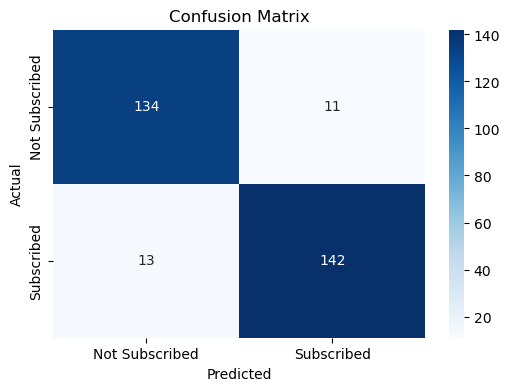

In [10]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()

In [11]:
#Let’s adjust the hyperparameters and see which settings work best.
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params=dict(penalty=penalty,C=c_values,solver=solver)

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [13]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [14]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
print("Best params",grid.best_params_)
print("Best Score",grid.best_score_)

Best params {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score 0.9228571428571429


In [16]:
y_pred=(grid.predict(X_test))

Accuracy Score: 0.9233333333333333
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       145
           1       0.95      0.90      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



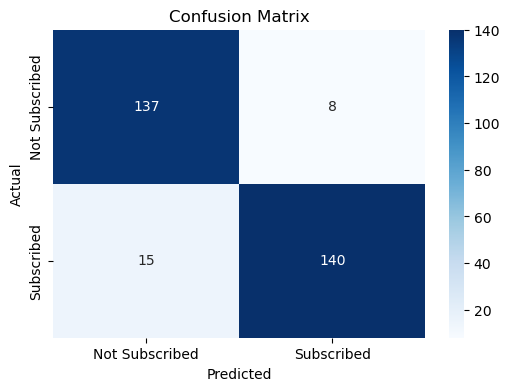

In [17]:
#Slightly better results
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()

In [18]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [19]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [20]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

In [21]:

y_pred=randomcv.predict(X_test)

Accuracy Score: 0.9266666666666666
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       145
           1       0.97      0.89      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



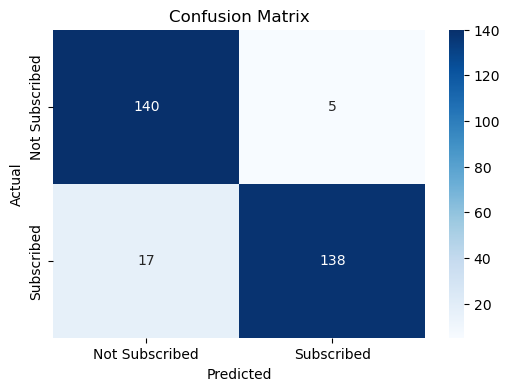

In [22]:
#A faster solution for searching best parameters
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()